# Keras MNIST Model

In [1]:
!pip3 install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Normalization

inputs = Input(shape=(28, 28, 1))
outputs = Normalization()(inputs)
outputs = Dropout(0.25)(outputs)
outputs = Conv2D(filters=32, kernel_size=3, activation='relu')(outputs)
outputs = Conv2D(filters=64, kernel_size=3, activation='relu')(outputs)
outputs = MaxPooling2D(pool_size=(2, 2))(outputs)
outputs = Flatten()(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(10, activation='softmax')(outputs)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                           

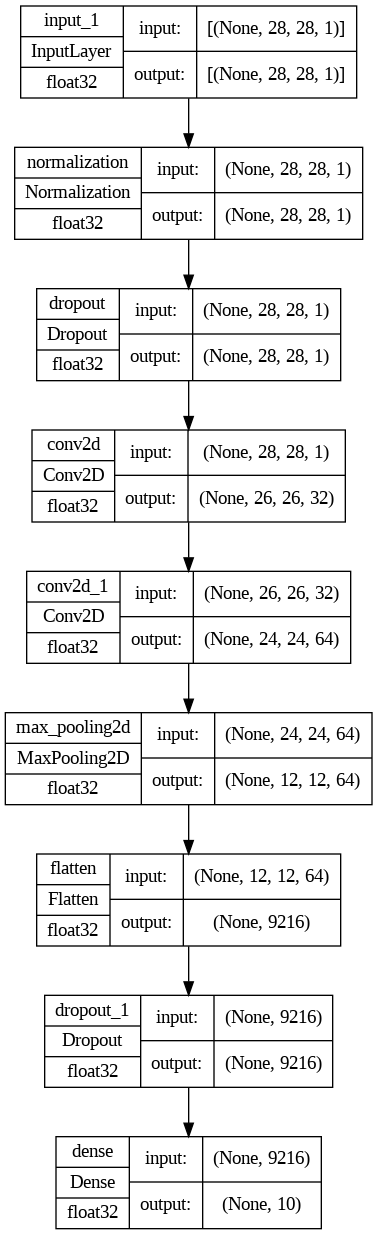

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [5]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='mnist',
        save_weights_only=True,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'),
    tf.keras.callbacks.EarlyStopping(patience=10)
]

model.fit(x_train, y_train, validation_data=(x_val, y_val), 
          epochs=1000, batch_size=32, callbacks=callbacks)

Epoch 1/1000
1500/1500 [==============================] - 163s 107ms/step - loss: 0.5713 - accuracy: 0.9012 - val_loss: 0.1210 - val_accuracy: 0.9642
Epoch 2/1000
1500/1500 [==============================] - 142s 95ms/step - loss: 0.1883 - accuracy: 0.9433 - val_loss: 0.0936 - val_accuracy: 0.9721
Epoch 3/1000
1500/1500 [==============================] - 145s 97ms/step - loss: 0.1502 - accuracy: 0.9536 - val_loss: 0.0845 - val_accuracy: 0.9753
Epoch 4/1000
1500/1500 [==============================] - 146s 97ms/step - loss: 0.1374 - accuracy: 0.9580 - val_loss: 0.0809 - val_accuracy: 0.9772
Epoch 5/1000
1500/1500 [==============================] - 146s 97ms/step - loss: 0.1234 - accuracy: 0.9615 - val_loss: 0.0714 - val_accuracy: 0.9767
Epoch 6/1000
1500/1500 [==============================] - 142s 95ms/step - loss: 0.1134 - accuracy: 0.9640 - val_loss: 0.0731 - val_accuracy: 0.9782
Epoch 7/1000
1500/1500 [==============================] - 143s 96ms/step - loss: 0.1074 - accuracy: 0.966

In [6]:
model.load_weights('mnist')

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.0554 - accuracy: 0.9811


[0.05538102239370346, 0.9811000227928162]

In [8]:
y_test = y_test.argmax(axis=1)
predicted = model.predict(x_test).argmax(axis=1)

predicted

313/313 [==============================] - 8s 25ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



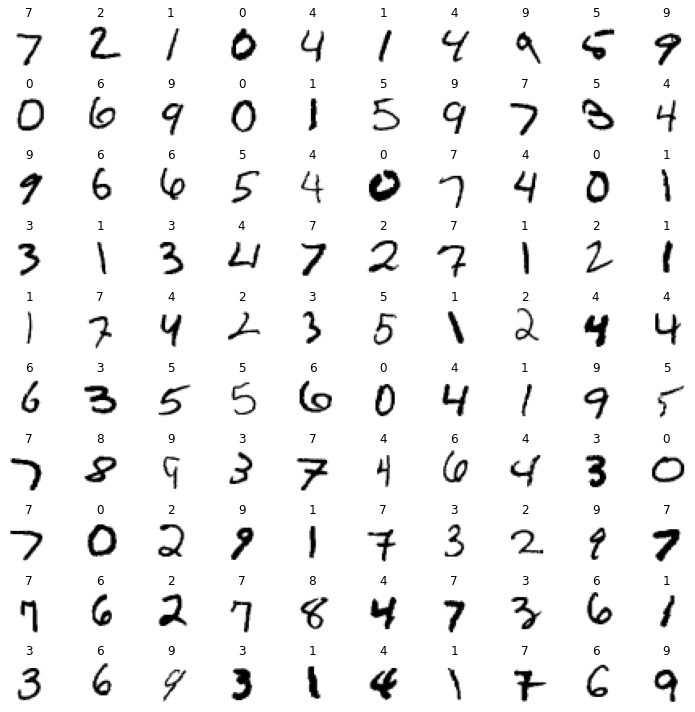

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary')
    ax.set_title(f'{predicted[i]}')

plt.tight_layout()
plt.show()

In [11]:
model.save('./mnist_model')